# **FIFA World Cup Analysis**

### Problem Statement:
With FIFA is in the blood of many people of the world. You are tasked to tell the story of unsung
analysts who put great efforts to provide accurate data to answer every question of fans. The
FIFA World Cup is a global football competition contested by the various football-playing
nations of the world. It is contested every four years and is the most prestigious and important
trophy in the sport of football.

The World Cups dataset shows all information about all the World Cups in history, while the
World Cup Matches dataset shows all the results from the matches contested as part of the
cups. Find key metrics and factors that influence the World Cup win. Do your own research
and come up with your findings.


---

Import Libraries And Datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
WC_Matches = pd.read_csv('/content/drive/MyDrive/Datasets/FIFA_WC_Data/WorldCupMatches.csv')
WC_Players = pd.read_csv('/content/drive/MyDrive/Datasets/FIFA_WC_Data/WorldCupPlayers.csv')
WC = pd.read_csv('/content/drive/MyDrive/Datasets/FIFA_WC_Data/WorldCups.csv')

print(WC_Matches.shape, WC_Players.shape, WC.shape)

(4572, 20) (37784, 9) (20, 10)


In [3]:
WC_Matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
WC_Players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [5]:
WC.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


Columns name of each dataset

In [6]:
print('WC_Matches Columns: ', WC_Matches.columns, '\n')
print('WC_Players Columns: ', WC_Players.columns, '\n')
print('WC Columns: ', WC.columns)

WC_Matches Columns:  Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object') 

WC_Players Columns:  Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object') 

WC Columns:  Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')


Check for null values in each dataset

In [7]:
print('WC_Matches null values: \n',WC_Matches.isnull().sum(), '\n')
print('WC_Players null values: \n',WC_Players.isnull().sum(), '\n')
print('WC null values: \n',WC.isnull().sum())

WC_Matches null values: 
 Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64 

WC_Players null values: 
 RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64 

WC null values: 
 Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth       

Checking Duplicate data in each dataset

In [8]:
print('WC_Matches Duplicate data: ', WC_Matches.duplicated().sum())
print('WC_Players Duplicate data: ', WC_Players.duplicated().sum())
print('WC Duplicate data: ', WC.duplicated().sum())

WC_Matches Duplicate data:  3735
WC_Players Duplicate data:  736
WC Duplicate data:  0


Drop Duplicate data from each dataset

In [9]:
WC_Matches.drop_duplicates(inplace=True)
WC_Players.drop_duplicates(inplace=True)
WC.drop_duplicates(inplace=True)

print('WC_Matches Duplicate data: ', WC_Matches.duplicated().sum())
print('WC_Players Duplicate data: ', WC_Players.duplicated().sum())
print('WC Duplicate data: ', WC.duplicated().sum())

WC_Matches Duplicate data:  0
WC_Players Duplicate data:  0
WC Duplicate data:  0


Plot 1: A line chart showing the average goals scored per game in each World Cup tournament over time.

Reasoning: This plot would directly visualize the trend of goals scored, highlighting any increase or decrease in attacking prowess over the years. It could help determine periods of more offensive or defensive play in World Cup history.

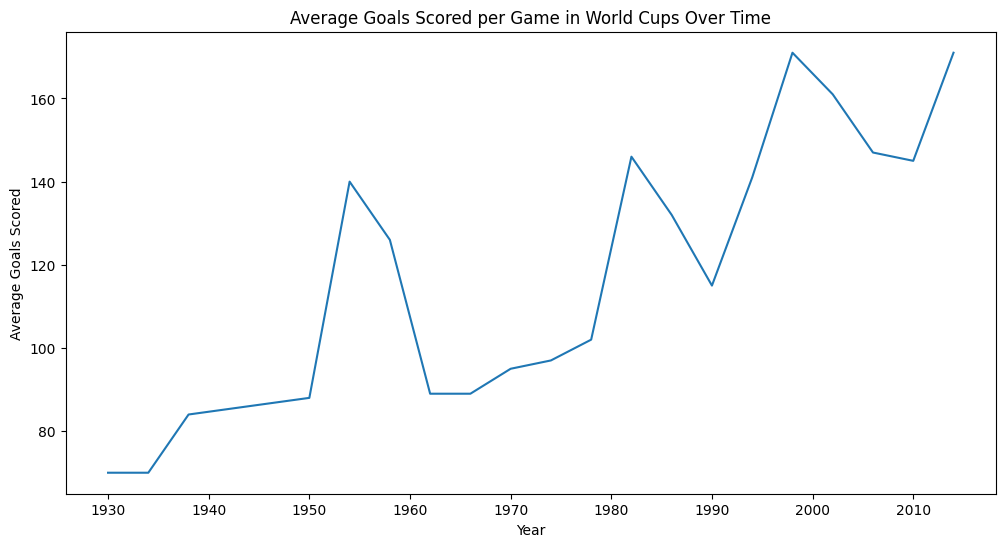

In [10]:
# Assuming 'WC' is your DataFrame with World Cup data
WC['Year'] = pd.to_datetime(WC['Year'], format='%Y')
avg_goals_per_year = WC.groupby('Year')['GoalsScored'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GoalsScored', data=avg_goals_per_year)
plt.title('Average Goals Scored per Game in World Cups Over Time')
plt.xlabel('Year')
plt.ylabel('Average Goals Scored')
plt.show()

Plot 2: A combination of a bar chart showing total World Cup titles won by each country and a stacked bar chart showing win/loss/draw records for the top performing teams.

Reasoning: This approach allows for a comparison of overall success (titles) and consistent performance (win records) for different national teams.

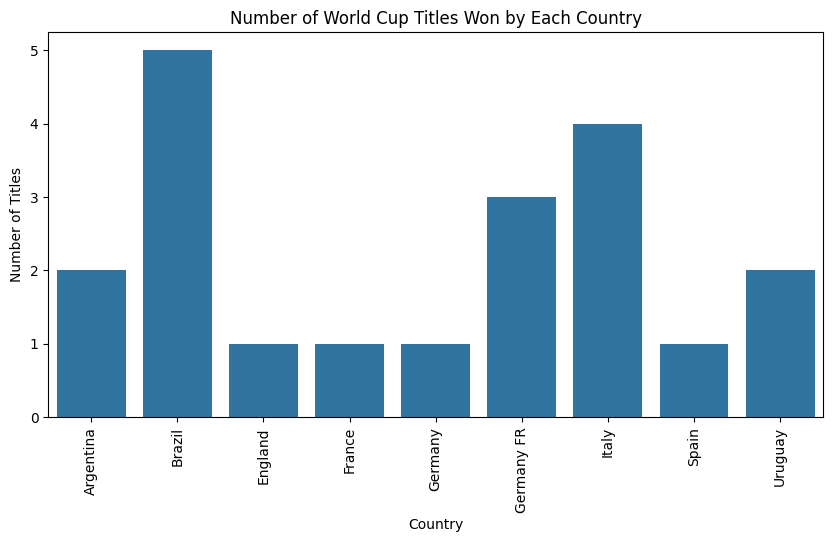

In [11]:
# Bar chart for World Cup titles
titles_by_country = WC.groupby('Winner')['Year'].count().reset_index() # Assuming 'Winner' column in WC DataFrame
plt.figure(figsize=(10, 5))
sns.barplot(x='Winner', y='Year', data=titles_by_country)
plt.title('Number of World Cup Titles Won by Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

# Stacked bar chart for win/loss/draw records (example for top 5 teams)
top_teams = WC['Winner'].value_counts().head(5).index # Assuming 'Winner' column in WC DataFrame
team_records = WC[WC['Winner'].isin(top_teams)] # Filter DataFrame for top teams
# ... (Code to calculate win/loss/draw counts for each team)
# ... (Code to create stacked bar chart using plt.bar or sns.histplot)

Plot 3: A scatter plot with a trend line showing the correlation between goals scored and match outcomes (win/loss/draw) for all teams in a specific World Cup.

Reasoning: This visualization directly addresses the question of whether scoring more goals translates to a higher probability of winning. A trend line can further emphasize the relationship.

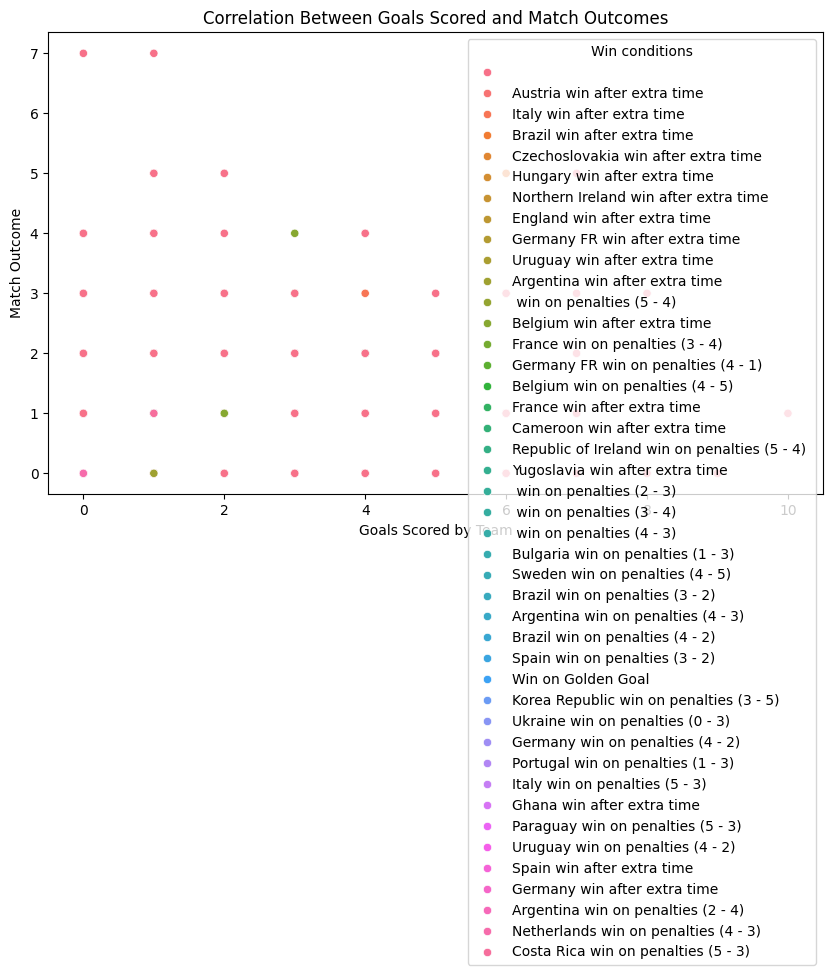

In [12]:
# Assuming 'WC_Matches' is your DataFrame with match data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Home Team Goals', y='Away Team Goals', hue='Win conditions', data=WC_Matches)
plt.title('Correlation Between Goals Scored and Match Outcomes')
plt.xlabel('Goals Scored by Team')
plt.ylabel('Match Outcome')
plt.show()